<a href="https://colab.research.google.com/github/miguelDeSaAdegas/machineLearning/blob/main/BIN3100_ML_S3_2023_Premier_Mod%C3%A8le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIN3100 ML S3

## Théorie: Vidéos

Dans cette leçon nous apprendrons à construire et valider un premier modèle de Machine Learning
Il y a trois vidéos à regarder obligatoirement. Ces vidéos durent un total d'un peu moins d'une heure. Je vous suggère pour en tirer un maximum d'ouvrir un colab pour écrire et exécuter de votre côté le code que le YouTuber écrit.

1. [PYTHON SKLEARN: KNN, LinearRegression et SUPERVISED LEARNING](https://www.youtube.com/watch?v=P6kSc3qVph0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=20)
2. [PYTHON SKLEARN - MODEL SELECTION : Train_test_split, Cross Validation, GridSearchCV](https://www.youtube.com/watch?v=w_bLGK4Pteo&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=21)
3. [CROSS-VALIDATION SKLEARN PYTHON](https://www.youtube.com/watch?v=VoyMOVfCSfc&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=22)

La vidéo suivante est optionnelle.
4. [MÉTRIQUES de RÉGRESSIONS en DATA SCIENCE](https://www.youtube.com/watch?v=VoyMOVfCSfc&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=23)

##  Une étude de cas: détection du cancer du sein

In [ ]:
#import des bibliothèques de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import du data wine recognition depuis sklearn
from sklearn import datasets
data = datasets.load_breast_cancer()
print(data.DESCR)

X = data.data
y = data.target

print(X.shape)
type(X)

##Quel objectif initial vous êtes-vous fixé?

<font color='red'> Répondez à cette question ici

---




##Exploration des données

Exploratory Data Analysis

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.


1.   Analyse de la forme:

  a. Identification de la target: <font color='red'> Quel est votre target? </font>

  b. Nombre des lignes et de colonnes: <font color='red'> Quelle est la forme de votre dataset? </font>

  c. Types de variables: <font color='red'> Quelles sont les types de vos données?</font>

2.   Analyse du fond:

  a. Visualisation de la target <font color='red'>

	b. Compréhension des différentes variables



<font color='red'>Analyse de la forme: Répondez-ici </font>




<font color='red'> Analyse de fond Répondez-ici </font>

##Construisez votre modèle ici

Utilisez un knn pour pour pour créer un premier modèle.

Essayez de produire du code le plus indépendant possible du modèle utilisé.

KNeighborsClassifier(n_neighbors=6)

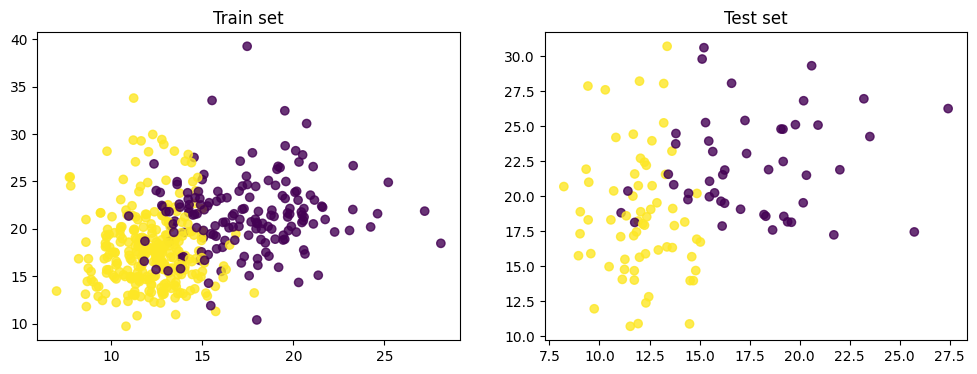

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)

##Testez votre modèle ici

Mesurez la performance du modèle.



In [29]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9362637362637363
0.9473684210526315


## La meilleure valeur de voisins

Écrivez un programme qui permet de trouver la meilleure valeur de voisin n_neighbors possible pour le modele de KNeighborsClassifier.

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6}

## Learning curve

A l'aide de la learning curve, essayez de voir à partir de combien d'exemple le modèle n'améliore plus vraiment ses performances.

[ 36  72 109 145 182 218 254 291 327 364]


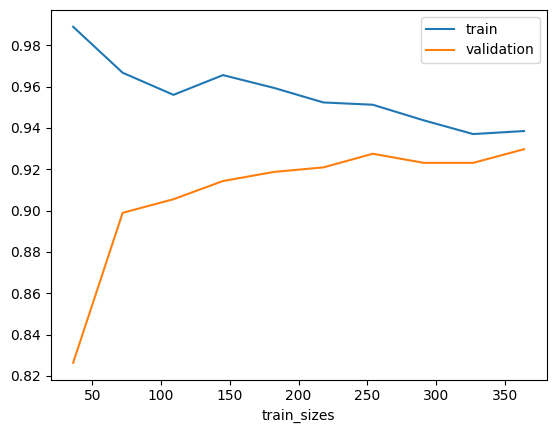

In [31]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Decision Tree
Faites un nouveau modèle à l'aide d'un arbre de décision et comparez les performances avec le knn.

{'max_depth': 2}
model score train: 0.9538461538461539
model score test 0.956140350877193
[ 36  72 109 145 182 218 254 291 327 364]
0.9296703296703296
0.9383399209486166
0.9296703296703297
0.9383399209486166


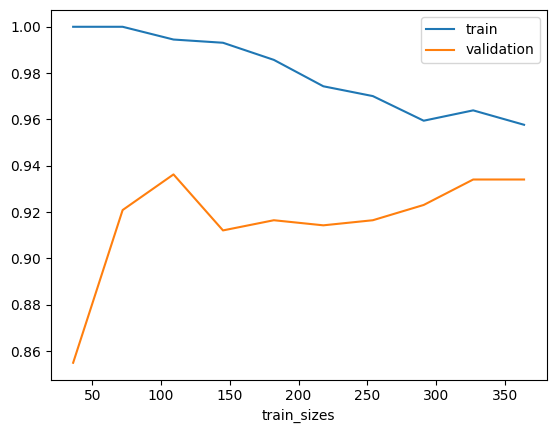

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

param_grid = {'max_depth': np.arange(1,20)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid, cv=5)

grid.fit(X_train, y_train)

param_grid_KN = {'n_neighbors': np.arange(1,20),
              'metric': ['euclidean', 'manhattan']}

grid_KN = GridSearchCV(KNeighborsClassifier(), param_grid_KN, cv=5)

grid_KN.fit(X_train, y_train)


model = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], random_state=5)
print(grid.best_params_)
model.fit(X_train, y_train)

print("model score train:", model.score(X_train, y_train))
print("model score test", model.score(X_test, y_test))

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

print(cross_val_score(KNeighborsClassifier(n_neighbors=grid_KN.best_params_['n_neighbors']), X_train, y_train, cv=5, scoring='accuracy').mean())
print(cross_val_score(KNeighborsClassifier(n_neighbors=grid_KN.best_params_['n_neighbors']), X_test, y_test, cv=5, scoring='accuracy').mean())
print(cross_val_score(DecisionTreeClassifier(max_depth=grid.best_params_['max_depth']), X_train, y_train, cv=5, scoring='accuracy').mean())
print(cross_val_score(DecisionTreeClassifier(max_depth=grid.best_params_['max_depth']), X_test, y_test, cv=5, scoring='accuracy').mean())

# Repérage des variables redondantes
A l'aide de la matrice corrélation, repérer les variables qui sont fortement corrélées.


# Elimination des variables redondantes
Choisissez des variables à éliminer et refaîtes un entrainement sur le KNN. Observez le changement de performances.